In [150]:
import pandas as pd
from ydata_profiling import ProfileReport
from category_encoders.cat_boost import CatBoostEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
df = pd.read_csv('../data/newborn_train.csv')

In [152]:
df

,mother_body_mass_index,mother_marital_status,mother_delivery_weight,mother_race,mother_height,mother_weight_gain,father_age,father_education,cigarettes_before_pregnancy,prenatal_care_month,number_prenatal_visits,previous_cesarean,newborn_gender,newborn_weight
0,30.8,2.0,220.0,1,65.0,35.0,29.0,6,0.0,2,10.0,N,F,3045
1,45.8,NaN,293.0,1,64.0,26.0,37.0,4,0.0,3,10.0,N,F,3061
2,NaN,1.0,NaN,1,66.0,NaN,33.0,6,0.0,3,NaN,N,F,3827
3,24.3,1.0,157.0,1,NaN,20.0,27.0,6,0.0,3,9.0,N,M,3997
4,24.1,1.0,187.0,1,65.0,42.0,29.0,8,0.0,2,12.0,N,F,3240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2398111,22.1,1.0,152.0,1,63.0,27.0,NaN,4,0.0,4,5.0,N,M,3015
2398112,34.0,2.0,260.0,2,71.0,16.0,33.0,3,0.0,1,13.0,N,M,3572
2398113,24.6,1.0,157.0,1,NaN,18.0,26.0,4,0.0,3,15.0,N,F,3299
2398114,26.1,NaN,185.0,1,61.0,47.0,31.0,1,0.0,2,15.0,N,M,3062


In [153]:
#profile = ProfileReport(df, title="Profiling Report")

In [154]:
#profile.to_file("regression_profile_report.html")

Columns:

- mother_body_mass_index – Body Mass Index of the mother
- mother_marital_status – is mother married? (1 = Yes, 2 = No)
- mother_delivery_weight – mother’s weight at delivery in pounds
- mother_race – race of the mother (1 = White (alone); 2 = Black (alone); 3 = AIAN (alone); 4 Asian (alone); 5 = NHOPI (alone); 6 = More than one race)
- mother_height – height of the mother in inches
- mother_weight_gain – mother’s weight gain during the pregnancy (in pounds)
- father_age – age of the father
- father_education – education of the father (1 = 8th grade or less; 2 = 9-12th grade, no diploma; 3 = High school graduate or GED completed; 4 = Some college credit but no degree; 5 = Associate degree; 6 = Bachelor’s degree; 7 = Master’s degree; 8 = Doctorate or Professional degree; 9 = unknown)
- cigarettes_before_pregnancy – number of cigarettes smoked daily by the mother before pregnancy (00-97 = number of cigarettes daily, 98 = 98 or more cigarettes daily)
- prenatal_care_month – pregnancy month in which prenatal care began (99 = no prenatal care)
- number_prenatal_visits – number of prenatal visits
- previous_cesarean – was there any previous cesarean delivery before (N = No; Y = Yes; U = Other)
- newborn_gender – gender of the newborn (F = female; M = male)
- newborn_weight – weight of the newborn in grams (outcome variable, only in the training sample)

Data prep tasks:

- drop duplicate rows
- check correlation
- previous_cesarean - imbalanced
- a lot of missing values to impute
- handle excess of zeros
- mother_body_mass_index - take logarithm
- mother_marital_status - encode with CatBoost
- mother_delivery_weight - log (?)
- mother_race - encode with CatBoost
- mother_weight_gain - add new var for 0
- father_education - encode with CatBoost
- cigarettes_before_pregnancy - binning 0 - 5 - 10 - 20
- prenatal_care_month - new var for no_parental_care (99)
- previous_cesarean - encode with CatBoost
- newborn_gender - encode with CatBoost
- newborn_weight - add new variables for premature babies and rainbow kids

## Transformations

In [155]:
tempt_df = df
tempt_df['log_transformed_mother_body_mass_index'] = np.log(df['mother_body_mass_index'])
tempt_df['log_transformed_mother_delivery_weight'] = np.log(df['mother_delivery_weight'])

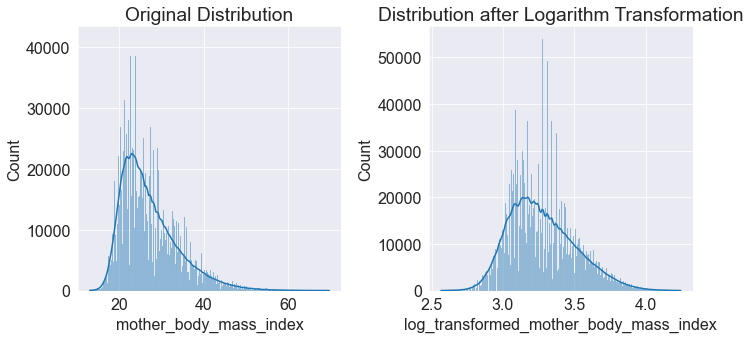

In [156]:
# Creating log_transformed_mother_body_mass_index
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data=df, x='mother_body_mass_index', kde=True, ax=axes[0])
axes[0].set_title('Original Distribution')
sns.histplot(data=tempt_df, x='log_transformed_mother_body_mass_index', kde=True, ax=axes[1])
axes[1].set_title('Distribution after Logarithm Transformation')
plt.tight_layout()
plt.show()

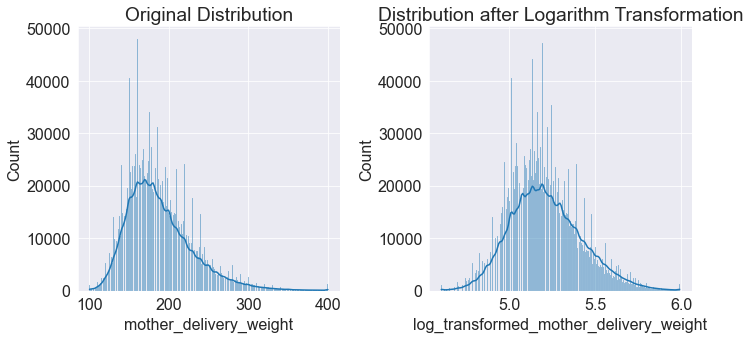

In [157]:
# Creating log_transformed_mother_delivery_weight
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data=df, x='mother_delivery_weight', kde=True, ax=axes[0])
axes[0].set_title('Original Distribution')
sns.histplot(data=tempt_df, x='log_transformed_mother_delivery_weight', kde=True, ax=axes[1])
axes[1].set_title('Distribution after Logarithm Transformation')
plt.tight_layout()
plt.show()

In [158]:
missing_values = df.isna().mean()*100
missing_values

mother_body_mass_index                     6.113132
mother_marital_status                     17.201420
mother_delivery_weight                     1.457728
mother_race                                0.000000
mother_height                             10.196713
mother_weight_gain                         3.063780
father_age                                18.535634
father_education                           0.000000
cigarettes_before_pregnancy                0.471245
prenatal_care_month                        0.000000
number_prenatal_visits                     2.497836
previous_cesarean                          0.000000
newborn_gender                             0.000000
newborn_weight                             0.000000
log_transformed_mother_body_mass_index     6.113132
log_transformed_mother_delivery_weight     1.457728
dtype: float64

In [159]:
df.duplicated().sum()

356

In [160]:
df.loc[df.duplicated(), :]

,mother_body_mass_index,mother_marital_status,mother_delivery_weight,mother_race,mother_height,mother_weight_gain,father_age,father_education,cigarettes_before_pregnancy,prenatal_care_month,number_prenatal_visits,previous_cesarean,newborn_gender,newborn_weight,log_transformed_mother_body_mass_index,log_transformed_mother_delivery_weight
205974,30.3,1.0,258.0,1,68.0,59.0,35.0,6,0.0,2,10.0,N,F,3033,3.411148,5.552960
214128,19.2,NaN,138.0,1,64.0,26.0,33.0,6,0.0,1,25.0,N,F,2335,2.954910,4.927254
229604,NaN,2.0,NaN,1,NaN,NaN,NaN,9,0.0,1,17.0,N,F,3290,NaN,NaN
268414,36.9,2.0,279.0,2,69.0,29.0,NaN,9,0.0,2,8.0,N,F,1545,3.608212,5.631212
333305,NaN,1.0,NaN,1,NaN,NaN,41.0,5,0.0,1,17.0,N,F,3232,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383170,36.3,1.0,261.0,1,66.0,36.0,29.0,4,0.0,2,17.0,N,M,2920,3.591818,5.564520
2384415,25.6,1.0,182.0,1,62.0,42.0,54.0,7,0.0,1,16.0,N,F,2765,3.242592,5.204007
2386633,29.3,1.0,205.0,2,64.0,34.0,48.0,6,0.0,2,12.0,N,F,1850,3.377588,5.323010
2387287,31.3,1.0,223.0,1,67.0,23.0,30.0,6,0.0,3,11.0,N,F,2155,3.443618,5.407172


In [161]:
df.drop_duplicates(inplace=True)

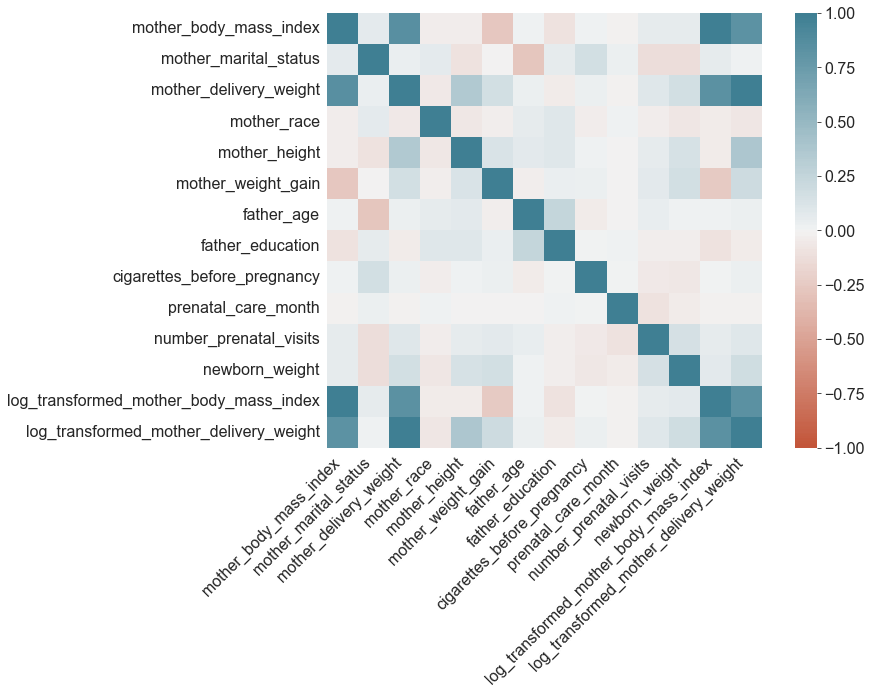

In [162]:
corr = df.corr()
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [163]:
categorical_variables = [col for col in df.columns if col in ['mother_marital_status', 'mother_race', 'father_education', 'previous_cesarean', 'newborn_gender']]
continuous_variables = [col for col in df.columns if col not in categorical_variables]

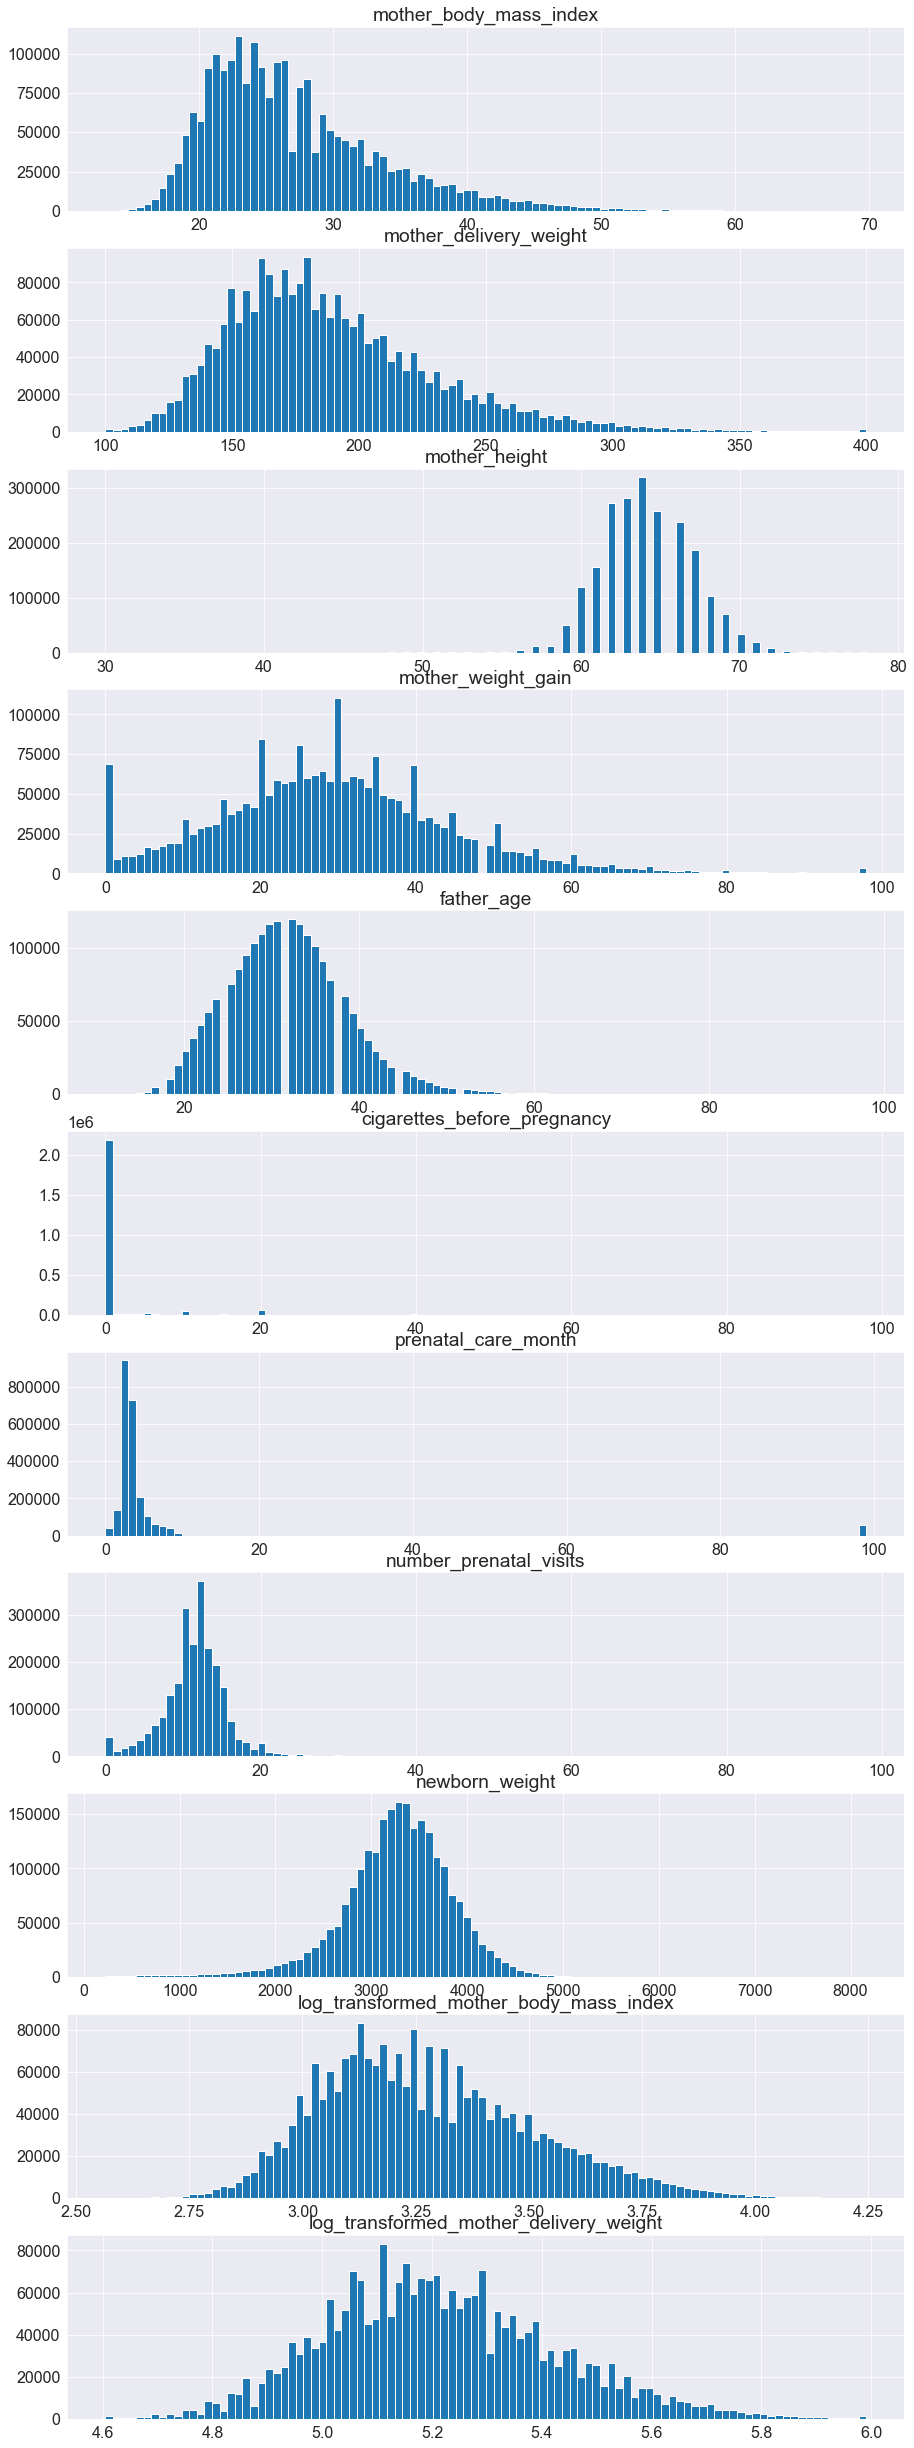

In [164]:
def plot_histograms(
        data: pd.DataFrame,
        columns: list,
        bins: int = 100,
        min_quantile: float = 0.0,
        max_quantile: float = 0.99,
) -> None:
    fig, axes = plt.subplots(len(columns), 1)
    fig.set_size_inches(15, 4 * len(columns))
    for ax, col in zip(axes, columns):
        ax.hist(
            data[col],
            bins=bins,
            range=(
                data[col].quantile(q=min_quantile),
                data[col].quantile(q=max_quantile),
            ),
        )
        ax.set_title(col)


plot_histograms(
    data=df, columns=continuous_variables, bins=100, min_quantile=0.0, max_quantile=1
)

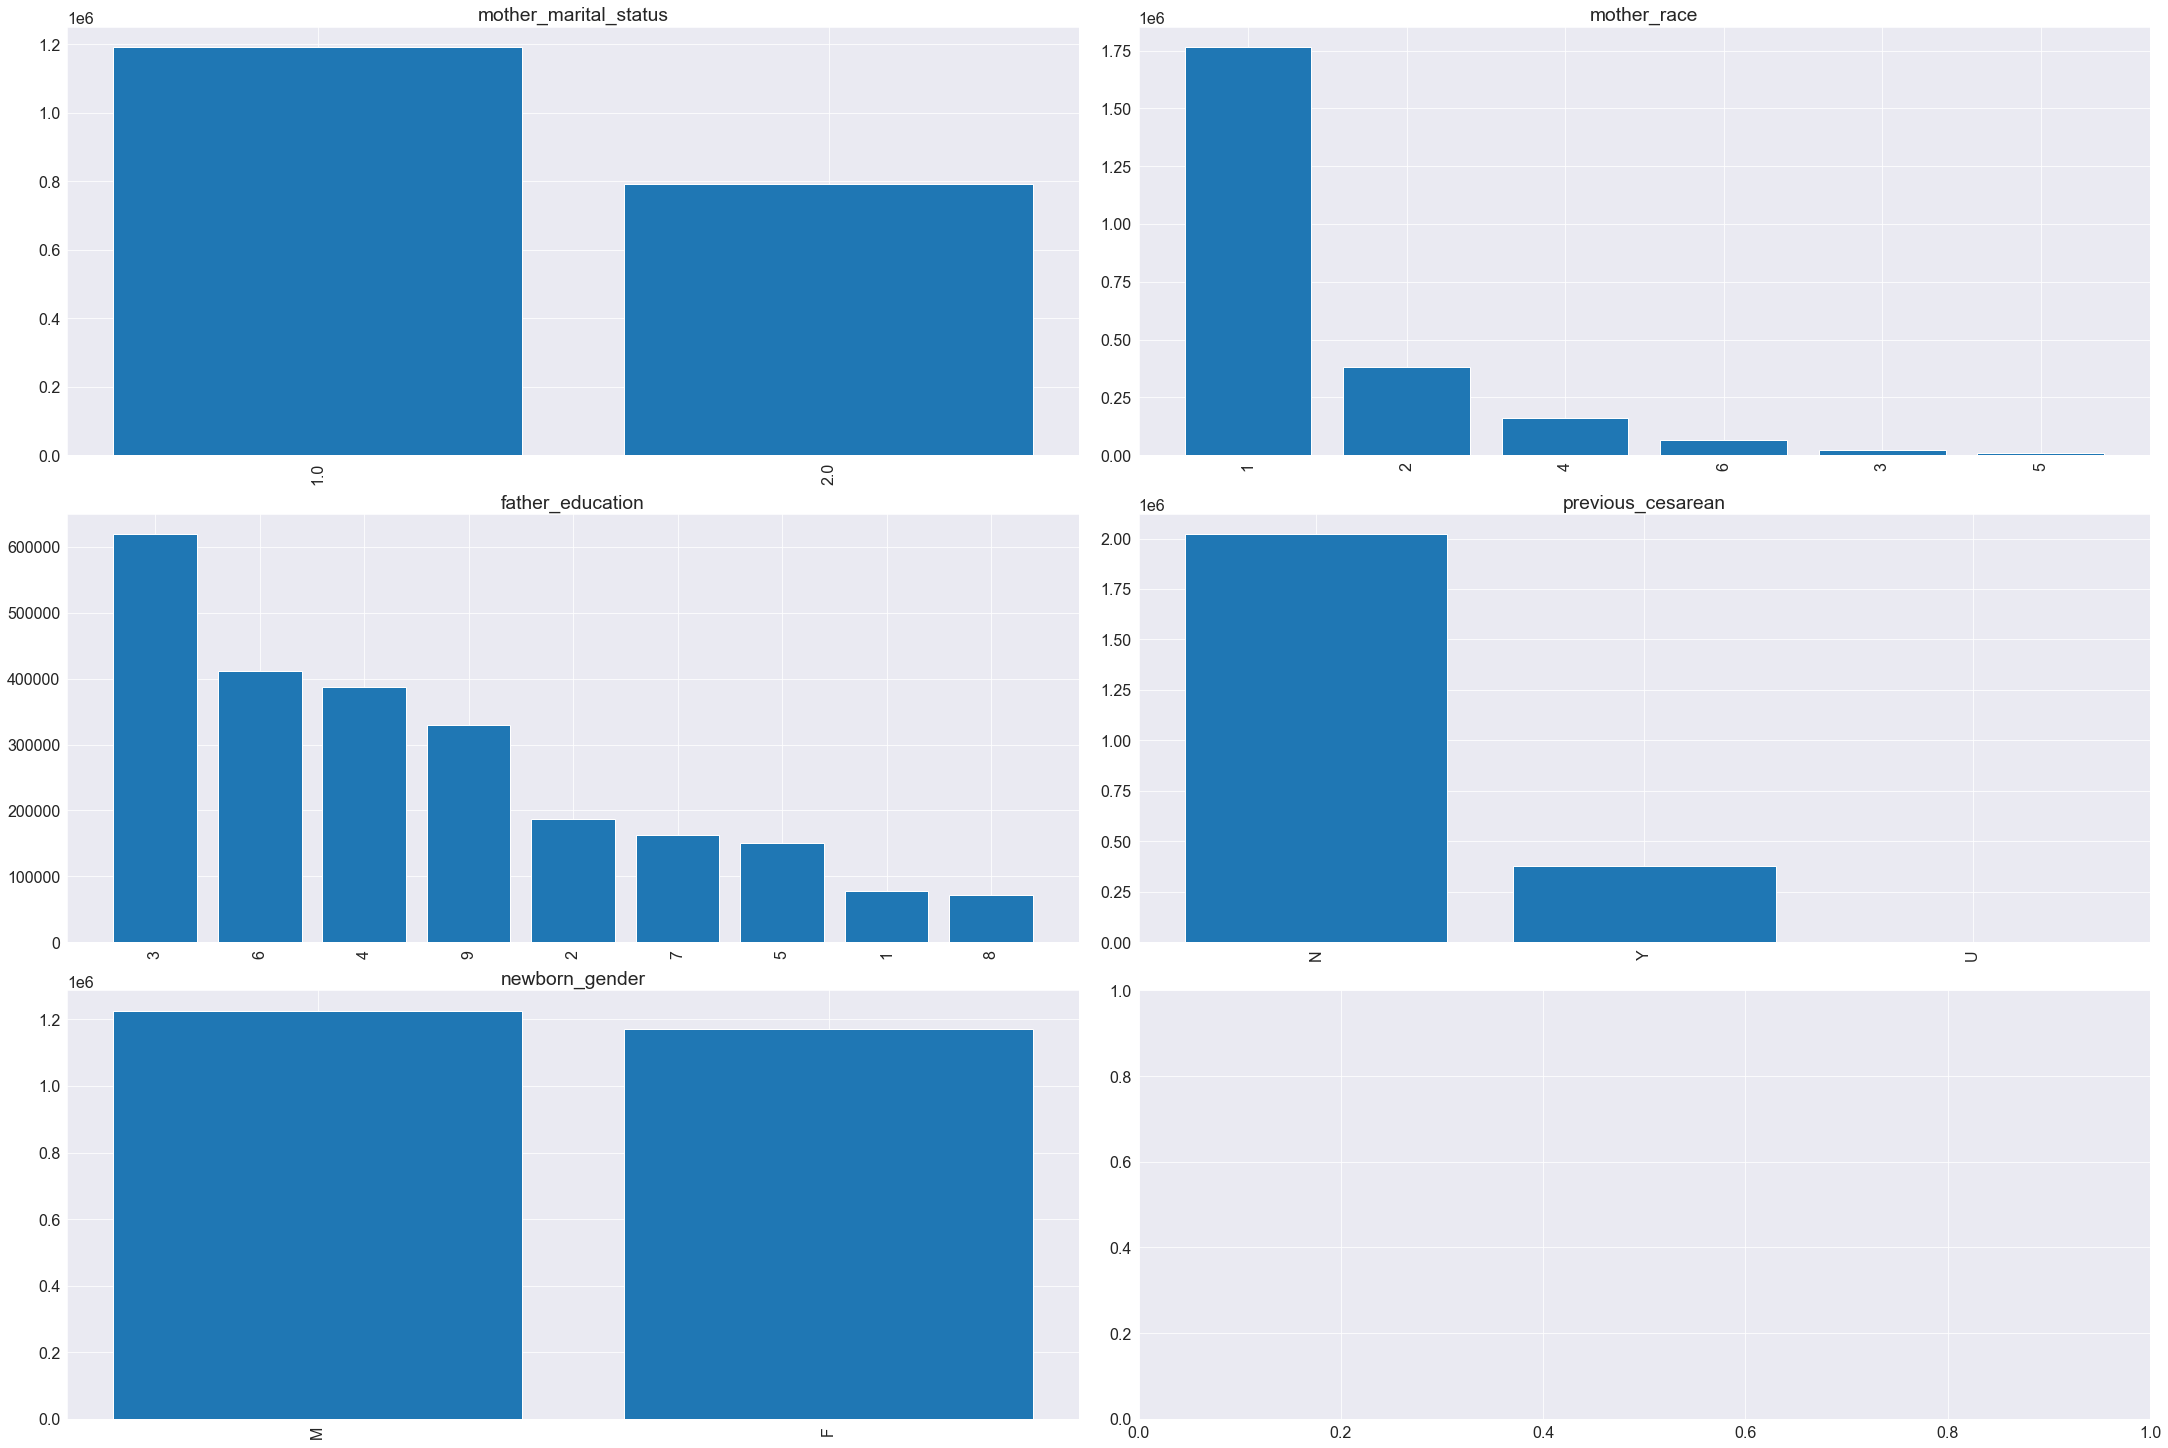

In [165]:
plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(3, 2, sharex=False, sharey=False, constrained_layout = True, figsize=(30, 20))
a = 0

for cat_col in categorical_variables:
    value_counts = df[cat_col].value_counts()

    trace_x = a // 2
    trace_y = a % 2
    x_pos = np.arange(0, df[cat_col].nunique())

    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)

    axs[trace_x, trace_y].set_title(cat_col)

    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)

    a += 1

plt.show()

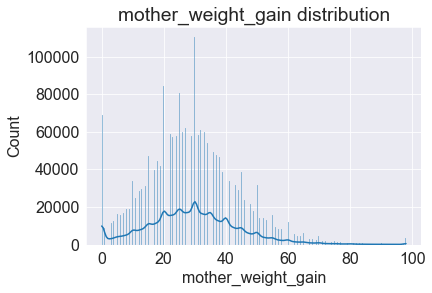

In [166]:
sns.histplot(data=df, x='mother_weight_gain', kde=True)
plt.title('mother_weight_gain distribution')
plt.show()

In [167]:
df[df["mother_weight_gain"] == 0]['newborn_weight']

26         2892
120        2019
140        2995
256        3370
262        2891
           ... 
2397893     540
2397981    3657
2398014    3090
2398044    3110
2398048    3997
Name: newborn_weight, Length: 68719, dtype: int64

In [168]:
df['no_mother_weight_gain'] = np.where(df['mother_weight_gain'] == 0, 1, 0)

In [169]:
df.cigarettes_before_pregnancy.value_counts()

0.0     2186305
20.0      60071
10.0      53324
5.0       21144
3.0        9887
         ...   
92.0          1
69.0          1
29.0          1
73.0          1
72.0          1
Name: cigarettes_before_pregnancy, Length: 67, dtype: int64

In [170]:
df['cigarettes_before_pregnancy_0'] = np.where(df['cigarettes_before_pregnancy'] == 0, 1, 0)
df['cigarettes_before_pregnancy_0_5'] = np.where((df['cigarettes_before_pregnancy'] > 0) & (df['cigarettes_before_pregnancy'] <= 5), 1, 0)
df['cigarettes_before_pregnancy_5_10'] = np.where((df['cigarettes_before_pregnancy'] > 5) & (df['cigarettes_before_pregnancy'] <= 10), 1, 0)
df['cigarettes_before_pregnancy_10_20'] = np.where((df['cigarettes_before_pregnancy'] > 10) & (df['cigarettes_before_pregnancy'] <= 20), 1, 0)
df['cigarettes_before_pregnancy_20_30'] = np.where((df['cigarettes_before_pregnancy'] > 20) & (df['cigarettes_before_pregnancy'] <= 30), 1, 0)
df['cigarettes_before_pregnancy_30_40'] = np.where((df['cigarettes_before_pregnancy'] > 30) & (df['cigarettes_before_pregnancy'] <= 40), 1, 0)
df['cigarettes_before_pregnancy_60'] = np.where((df['cigarettes_before_pregnancy'] > 60), 1, 0)

In [171]:
df['no_prenatal_care_month'] = np.where(df['prenatal_care_month'] == 99, 1, 0)

In [172]:
df['newborn_gender'] =  np.where(df['newborn_gender'] == 'F', 1, 0)

In [173]:
df['previous_cesarean'] = df['previous_cesarean'].replace(['U'], np.NaN)
df['previous_cesarean'] =  np.where(df['previous_cesarean'] == 'Y', 1, 0)

## Encoding

In [174]:
cb_encoder = CatBoostEncoder()
cols_to_be_encoded = ['mother_marital_status', 'mother_race', 'father_education', 'previous_cesarean', 'newborn_gender']
target = df.newborn_weight

In [175]:
cb_encoder.fit(X=df, y=target, cols=cols_to_be_encoded, handle_missing='return_nan')
cb_encoder.transform(df)

,mother_body_mass_index,mother_marital_status,mother_delivery_weight,mother_race,mother_height,mother_weight_gain,father_age,father_education,cigarettes_before_pregnancy,prenatal_care_month,...,log_transformed_mother_delivery_weight,no_mother_weight_gain,cigarettes_before_pregnancy_0,cigarettes_before_pregnancy_0_5,cigarettes_before_pregnancy_5_10,cigarettes_before_pregnancy_10_20,cigarettes_before_pregnancy_20_30,cigarettes_before_pregnancy_30_40,cigarettes_before_pregnancy_60,no_prenatal_care_month
0,30.8,2.0,220.0,1,65.0,35.0,29.0,6,0.0,2,...,5.393628,0,1,0,0,0,0,0,0,0
1,45.8,NaN,293.0,1,64.0,26.0,37.0,4,0.0,3,...,5.680173,0,1,0,0,0,0,0,0,0
2,NaN,1.0,NaN,1,66.0,NaN,33.0,6,0.0,3,...,NaN,0,1,0,0,0,0,0,0,0
3,24.3,1.0,157.0,1,NaN,20.0,27.0,6,0.0,3,...,5.056246,0,1,0,0,0,0,0,0,0
4,24.1,1.0,187.0,1,65.0,42.0,29.0,8,0.0,2,...,5.231109,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2398111,22.1,1.0,152.0,1,63.0,27.0,NaN,4,0.0,4,...,5.023881,0,1,0,0,0,0,0,0,0
2398112,34.0,2.0,260.0,2,71.0,16.0,33.0,3,0.0,1,...,5.560682,0,1,0,0,0,0,0,0,0
2398113,24.6,1.0,157.0,1,NaN,18.0,26.0,4,0.0,3,...,5.056246,0,1,0,0,0,0,0,0,0
2398114,26.1,NaN,185.0,1,61.0,47.0,31.0,1,0.0,2,...,5.220356,0,1,0,0,0,0,0,0,0
